# Prosper Loan Data
## by Nonso Udechukwu

## 1. Introduction
This dataset is from Prosper, a top marketplace lending platform in the United States. It contains 113,937 loan records with 81 features, including loan data (e.g. loan amount, borrower rate, current loan status), borrower data (e.g. borrower income, employment status, and credit history), and credit risk data (e.g. ProsperScore).

I am interested in the annual fees a borrower pays (`BorrowerAPR`) and what variables might influence it.

## 2. Preliminary Wrangling

### 2.1 Gather

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Upgrade seaborn to be able to use relplot() and catplot()
#!pip install seaborn --upgrade

I will now load in the dataset.

In [2]:
# Load the Prosper Loan data into a pandas dataframe
loan_df = pd.read_csv("prosperLoanData.csv")

# Print the head of the data set
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### 2.2 Assess

I will now assess the data set's cleanliness and tidiness, focusing on the key columns mentioned above.

In [3]:
# High-level overview of data shape and composition
print(loan_df.shape)
print(loan_df.info())
loan_df.sample(20)

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRa

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
102549,C4F335347063735030F286B,544997,2011-12-16 18:35:03.630000000,NaN,36,Completed,2012-10-02 00:00:00,0.18478,0.1559,0.1459,...,-66.19,0.00,0.00,0.00,0.0,1.0,0,0,0.0,31
12999,F9D93595454793906C4A803,1045746,2013-11-24 06:08:58.573000000,NaN,60,Current,NaN,0.18197,0.1585,0.1485,...,-49.85,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
37442,9DC9341720778153811C7D4,306625,2008-04-09 06:50:15.713000000,HR,36,Chargedoff,2010-08-22 00:00:00,0.23627,0.2175,0.2075,...,-14.38,0.00,437.47,437.49,0.0,1.0,0,0,0.0,18
40408,DB583409519541503F56CBD,262895,2008-01-10 12:30:55.320000000,E,36,Defaulted,2009-12-24 00:00:00,0.33456,0.3175,0.3075,...,-45.55,0.00,2059.07,2059.05,0.0,1.0,0,0,0.0,43
3300,41AE3547730305283C4EFCF,591164,2012-05-20 19:15:02.063000000,NaN,36,Chargedoff,2013-05-06 00:00:00,0.35797,0.3177,0.3077,...,-19.19,0.00,3567.10,3567.10,0.0,1.0,0,0,0.0,7
109956,81D73557863247796C65569,637767,2012-09-11 15:21:48.827000000,NaN,36,Completed,2013-11-15 00:00:00,0.21434,0.1774,0.1674,...,-49.55,-30.62,0.00,0.00,0.0,1.0,0,0,0.0,20
74514,B7F23591597882701A0D96C,966321,2013-10-08 00:57:37.703000000,NaN,36,Completed,2014-02-27 00:00:00,0.30899,0.2699,0.2599,...,-21.71,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
72605,8F3435961595293345B6E91,1018546,2013-12-01 05:37:58.217000000,NaN,36,Current,NaN,0.22773,0.1905,0.1805,...,-8.41,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
38928,48A93415649149405D1C60C,288330,2008-03-05 04:58:47.237000000,HR,36,Chargedoff,2008-12-12 00:00:00,0.37453,0.3500,0.3400,...,-5.60,0.00,2243.86,2243.86,0.0,1.0,0,0,0.0,17
69759,ED8535426837062502F7E99,570584,2012-03-21 08:10:17.397000000,NaN,60,Current,NaN,0.31375,0.2870,0.2770,...,-207.83,0.00,0.00,0.00,0.0,1.0,0,0,0.0,83


Since the goal of this exploration is to understand what features affect BorrowerAPR, I'll be dropping most of the 81 columns of this dataset.

#### Selecting the key columns of interest

In [4]:
# Create a list of the key columns of interest
key_cols = ['ListingNumber', 'ListingCategory (numeric)', 'LoanOriginationDate', 'LoanOriginalAmount', 'Term', 'LoanStatus', 
             'IncomeRange', 'StatedMonthlyIncome','MonthlyLoanPayment', 'ProsperRating (Alpha)', 'BorrowerRate', 'BorrowerAPR', 
             'EmploymentStatus', 'Occupation', 'EmploymentStatusDuration', 'DebtToIncomeRatio', 'AvailableBankcardCredit', 'IsBorrowerHomeowner', 
             'CurrentDelinquencies', 'DelinquenciesLast7Years']

In [5]:
# Quick summary of the key columns
loan_df[key_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 20 columns):
ListingNumber                113937 non-null int64
ListingCategory (numeric)    113937 non-null int64
LoanOriginationDate          113937 non-null object
LoanOriginalAmount           113937 non-null int64
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
IncomeRange                  113937 non-null object
StatedMonthlyIncome          113937 non-null float64
MonthlyLoanPayment           113937 non-null float64
ProsperRating (Alpha)        84853 non-null object
BorrowerRate                 113937 non-null float64
BorrowerAPR                  113912 non-null float64
EmploymentStatus             111682 non-null object
Occupation                   110349 non-null object
EmploymentStatusDuration     106312 non-null float64
DebtToIncomeRatio            105383 non-null float64
AvailableBankcardCredit      106393 non-null float64
IsB

In [6]:
# Check for duplicates
dup = loan_df[key_cols].duplicated().sum()
print('There are {} duplicate records in this dataset'.format(dup))

There are 871 duplicate records in this dataset


In [7]:
# Check for nulls
loan_df[key_cols].isnull().sum()

ListingNumber                    0
ListingCategory (numeric)        0
LoanOriginationDate              0
LoanOriginalAmount               0
Term                             0
LoanStatus                       0
IncomeRange                      0
StatedMonthlyIncome              0
MonthlyLoanPayment               0
ProsperRating (Alpha)        29084
BorrowerRate                     0
BorrowerAPR                     25
EmploymentStatus              2255
Occupation                    3588
EmploymentStatusDuration      7625
DebtToIncomeRatio             8554
AvailableBankcardCredit       7544
IsBorrowerHomeowner              0
CurrentDelinquencies           697
DelinquenciesLast7Years        990
dtype: int64

I'll have to drop null records in ProsperRating (Alpha), DebtToIncomeRatio, etc. Null values in Occupation, EmploymentStatus will be filled in with 'None Provided'. 

In [8]:
# Examine ListingCategory
loan_df['ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

In [9]:
loan_df['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

Since there are three distinct values in 'Term', I'll treat Term as an ordinal categorical data.

In [10]:
# Examine ProsperRating (Alpha)
loan_df['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [11]:
# Examine EmploymentStatus
loan_df['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [12]:
# Examine IsBorrowerHomeowner
loan_df['IsBorrowerHomeowner'].value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

I'll have to change the values of IsBorrowerHomeowner from (True, False) to ('Homeowner', 'Not Homeowner') and convert to category datatype.

In [13]:
# Examine IncomeRange
loan_df['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

I'll be replacing 'Not employed' with '$0'

In [14]:
# Check null values
loan_df.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [15]:
# Examine StatedMonthlyIncome
loan_df['StatedMonthlyIncome'].value_counts()

4166.666667     3526
5000.000000     3389
3333.333333     2917
3750.000000     2428
5416.666667     2374
5833.333333     2319
6250.000000     2276
2500.000000     2256
4583.333333     2211
6666.666667     2162
2916.666667     1984
8333.333333     1680
4333.333333     1527
7083.333333     1464
7500.000000     1448
3500.000000     1394
0.000000        1394
10000.000000    1282
4000.000000     1260
2083.333333     1256
3000.000000     1218
2666.666667     1110
6000.000000     1051
9166.666667      969
3166.666667      958
4500.000000      870
7916.666667      811
5166.666667      804
4666.666667      760
12500.000000     759
                ... 
3972.666667        1
5103.666667        1
8493.333333        1
8494.083333        1
3350.500000        1
2177.916667        1
6354.250000        1
1805.000000        1
5111.083333        1
3.166667           1
6748.500000        1
5572.000000        1
3212.333333        1
5804.500000        1
8170.666667        1
3512.000000        1
5721.583333  

#### Assessment Summary

1. Subset key features from the dataset.
2. Rename `ListingCategory (numeric)` and `ProsperRating (Alpha)` to 'ListingCategory' and 'ProsperRating'
3. Remove duplicate records
4. Get rid of null records
   - Filter out null records in `BorrowerAPR`, `ProsperRating`, `DebtToIncomeRatio`, and `EmploymentStatus`
   - Convert null records in `Occupation` to 'Not Provided'
5. Replace:
   - `IsBorrowerHomeowner` (True, False) values with ('Homeowner', 'Not Homeowner')
   - 'Not employed' values in `IncomeRange` with '$0'.
6. The following have the wrong datatype. Convert:
   - `ListingNumber` to string
   - `LoanOriginationDate` to pandas datetime
   - `LoanStatus`, `ListingCategory`, `EmploymentStatus`, `IsBorrowerHomeowner` to categorical datatype
   - `ProsperRating` and `IncomeRange` to ordered categorical datatype
7. Round up `StatedMonthlyIncome`

### 2.3 Clean

In [16]:
# Make a copy of the original dataframe
loan_df_clean = loan_df.copy()

#### 2.3.1. Subset key features from the dataset

In [17]:
loan_df_clean = loan_df_clean[key_cols]

# Confirm changes were successful
assert len(loan_df_clean.columns) == len(key_cols)

#### 2.3.2 Rename `ListingCategory (numeric)` and `ProsperRating (Alpha)` to 'ListingCategory' and 'ProsperRating'

In [18]:
# Create a dictionary of the features to be renamed
rename_map = {'ListingCategory (numeric)': 'ListingCategory', 'ProsperRating (Alpha)': 'ProsperRating'}

# Rename the columns
loan_df_clean = loan_df_clean.rename(columns = rename_map)

# Confirm changes were successful
for col in ['ListingCategory', 'ProsperRating']:
    assert col in loan_df_clean.columns

#### 2.3.3 Remove duplicate records

In [19]:
loan_df_clean = loan_df_clean.drop_duplicates()

# Confirm changes were successful
assert not loan_df_clean.duplicated().any()

#### 2.3.4 Drop null records

In [20]:
# Filter out null records in ProsperRating, DebtToIncomeRatio, and EmploymentStatusDuration
null_records = ['ProsperRating', 'DebtToIncomeRatio', 'EmploymentStatusDuration']

for col in null_records:
    loan_df_clean = loan_df_clean[loan_df_clean[col].notnull()]

In [21]:
# Convert null records in Occupation to 'Not Provided'
loan_df_clean['Occupation'] = loan_df_clean['Occupation'].fillna('Not Provided')

In [22]:
# Confirm changes were successful
loan_df_clean.isnull().sum()

ListingNumber               0
ListingCategory             0
LoanOriginationDate         0
LoanOriginalAmount          0
Term                        0
LoanStatus                  0
IncomeRange                 0
StatedMonthlyIncome         0
MonthlyLoanPayment          0
ProsperRating               0
BorrowerRate                0
BorrowerAPR                 0
EmploymentStatus            0
Occupation                  0
EmploymentStatusDuration    0
DebtToIncomeRatio           0
AvailableBankcardCredit     0
IsBorrowerHomeowner         0
CurrentDelinquencies        0
DelinquenciesLast7Years     0
dtype: int64

#### 2.3.5 Replace values in `IsBorrowerHomeowner` and `IncomeRange`

In [23]:
# Convert IsBorrowerHomeowner values from (True, False) to (Homeowner, Not Homeowner)
homeowner_nothomeowner_map = {True: 'Homeowner', False: 'Not Homeowner'}

loan_df_clean['IsBorrowerHomeowner'] = loan_df_clean['IsBorrowerHomeowner'].map(homeowner_nothomeowner_map)

# Confirm changes were successful
loan_df_clean['IsBorrowerHomeowner'].value_counts()

Homeowner        41665
Not Homeowner    35089
Name: IsBorrowerHomeowner, dtype: int64

In [24]:
# Replace 'Not employed' values in `IncomeRange` with '$0'.
loan_df_clean['IncomeRange'] = loan_df_clean['IncomeRange'].str.replace('Not employed', '$0')

# Confirm changes were successful
assert 'Not employed' not in loan_df_clean['IncomeRange']

#### 2.3.6 Datatype conversations

In [25]:
# Convert ListingNumber to String
loan_df_clean['ListingNumber'] = loan_df_clean['ListingNumber'].astype(str)

In [26]:
# import datetime from datetime
from datetime import datetime

# Convert LoanOriginationDate to datetime
loan_df_clean['LoanOriginationDate'] = pd.to_datetime(loan_df_clean['LoanOriginationDate'])

# Create Year column
loan_df_clean['LoanOriginationYear'] = loan_df_clean['LoanOriginationDate'].dt.year

# Drop LoanOriginationDate
loan_df_clean.drop(['LoanOriginationDate'], axis=1, inplace=True)

# Confirm changes were successful
loan_df_clean.head(1)

,ListingNumber,ListingCategory,LoanOriginalAmount,Term,LoanStatus,IncomeRange,StatedMonthlyIncome,MonthlyLoanPayment,ProsperRating,BorrowerRate,BorrowerAPR,EmploymentStatus,Occupation,EmploymentStatusDuration,DebtToIncomeRatio,AvailableBankcardCredit,IsBorrowerHomeowner,CurrentDelinquencies,DelinquenciesLast7Years,LoanOriginationYear
1,1209647,2,10000,36,Current,"$50,000-74,999",6125.0,318.93,A,0.092,0.12016,Employed,Professional,44.0,0.18,10266.0,Not Homeowner,0.0,0.0,2014


In [27]:
# Convert ListingCategory, Term, LoanStatus, EmploymentStatus, IsBorrowerHomeowner to categorical datatype
cat_var = ['ListingCategory', 'Term', 'LoanStatus', 'EmploymentStatus', 'IsBorrowerHomeowner']

loan_df_clean[cat_var] = loan_df_clean[cat_var].astype('category')

# Confirm changes were successful
loan_df_clean[cat_var].dtypes

ListingCategory        category
Term                   category
LoanStatus             category
EmploymentStatus       category
IsBorrowerHomeowner    category
dtype: object

In [28]:
# Convert ProsperRating and IncomeRange to ordered categorical datatype
ordinal_var_dict = {'ProsperRating': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                   'IncomeRange' : ['Not displayed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                                   '$75,000-99,999','$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    loan_df_clean[var] = loan_df_clean[var].astype(ordered_var)
    
# Confirm changes were successful
loan_df_clean[['ProsperRating', 'IncomeRange']].dtypes

ProsperRating    category
IncomeRange      category
dtype: object

In [29]:
# Check data types
loan_df_clean.dtypes

ListingNumber                 object
ListingCategory             category
LoanOriginalAmount             int64
Term                        category
LoanStatus                  category
IncomeRange                 category
StatedMonthlyIncome          float64
MonthlyLoanPayment           float64
ProsperRating               category
BorrowerRate                 float64
BorrowerAPR                  float64
EmploymentStatus            category
Occupation                    object
EmploymentStatusDuration     float64
DebtToIncomeRatio            float64
AvailableBankcardCredit      float64
IsBorrowerHomeowner         category
CurrentDelinquencies         float64
DelinquenciesLast7Years      float64
LoanOriginationYear            int64
dtype: object

#### 2.3.7 Round up `StatedMonthlyIncome`

In [30]:
# Round up StatedMonthlyIncome
loan_df_clean['StatedMonthlyIncome'] = loan_df_clean['StatedMonthlyIncome'].round(decimals=0)

# Confirm changes were successful
loan_df_clean['StatedMonthlyIncome'].value_counts()

4167.0     2392
5000.0     2288
3333.0     1890
5833.0     1801
5417.0     1751
6250.0     1634
4583.0     1606
3750.0     1593
6667.0     1591
2500.0     1235
8333.0     1199
2917.0     1188
4333.0     1124
7083.0     1120
7500.0     1107
3500.0      968
10000.0     953
4000.0      850
6000.0      805
9167.0      780
3000.0      709
2667.0      683
3167.0      639
2083.0      638
4500.0      637
7917.0      621
5167.0      616
4667.0      594
4833.0      564
3583.0      537
           ... 
9278.0        1
6269.0        1
8905.0        1
11270.0       1
6759.0        1
2180.0        1
4865.0        1
4979.0        1
6597.0        1
1461.0        1
141.0         1
433.0         1
13017.0       1
8160.0        1
5359.0        1
7278.0        1
4456.0        1
16024.0       1
4459.0        1
1515.0        1
6559.0        1
7853.0        1
2923.0        1
9277.0        1
10102.0       1
9646.0        1
945.0         1
4304.0        1
3253.0        1
1543.0        1
Name: StatedMonthlyIncom

## 3. Report

### 3.1 Overview of subset dataframe

In [31]:
# High-level overview of data shape and composition
print(loan_df_clean.shape)
print(loan_df_clean.info())
loan_df_clean.sample(20)

(76754, 20)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 76754 entries, 1 to 113936
Data columns (total 20 columns):
ListingNumber               76754 non-null object
ListingCategory             76754 non-null category
LoanOriginalAmount          76754 non-null int64
Term                        76754 non-null category
LoanStatus                  76754 non-null category
IncomeRange                 76754 non-null category
StatedMonthlyIncome         76754 non-null float64
MonthlyLoanPayment          76754 non-null float64
ProsperRating               76754 non-null category
BorrowerRate                76754 non-null float64
BorrowerAPR                 76754 non-null float64
EmploymentStatus            76754 non-null category
Occupation                  76754 non-null object
EmploymentStatusDuration    76754 non-null float64
DebtToIncomeRatio           76754 non-null float64
AvailableBankcardCredit     76754 non-null float64
IsBorrowerHomeowner         76754 non-null category
CurrentD

,ListingNumber,ListingCategory,LoanOriginalAmount,Term,LoanStatus,IncomeRange,StatedMonthlyIncome,MonthlyLoanPayment,ProsperRating,BorrowerRate,BorrowerAPR,EmploymentStatus,Occupation,EmploymentStatusDuration,DebtToIncomeRatio,AvailableBankcardCredit,IsBorrowerHomeowner,CurrentDelinquencies,DelinquenciesLast7Years,LoanOriginationYear
82082,971514,1,25000,60,Current,"$100,000+",10833.0,650.58,C,0.1915,0.21576,Employed,Engineer - Mechanical,42.0,0.16,1936.0,Homeowner,0.0,0.0,2013
16749,757480,11,4500,36,Completed,"$50,000-74,999",4583.0,169.51,C,0.2099,0.24758,Employed,Fireman,11.0,0.20,5994.0,Not Homeowner,0.0,0.0,2013
41842,914165,1,10000,36,Current,"$75,000-99,999",7917.0,359.52,C,0.1760,0.21290,Employed,Other,293.0,0.24,2152.0,Not Homeowner,0.0,0.0,2013
36196,1047997,1,15000,60,Current,"$50,000-74,999",4833.0,374.81,C,0.1725,0.19630,Employed,Food Service Management,204.0,0.33,5401.0,Homeowner,0.0,0.0,2013
41014,1221446,1,13000,36,Current,"$50,000-74,999",6083.0,464.46,C,0.1715,0.20869,Employed,Professional,23.0,0.17,271.0,Not Homeowner,0.0,9.0,2014
26508,682796,1,7700,36,Current,"$50,000-74,999",5000.0,273.72,B,0.1679,0.20462,Employed,Computer Programmer,143.0,0.22,12949.0,Homeowner,0.0,0.0,2013
29757,484265,7,5000,36,Completed,"$50,000-74,999",5833.0,202.99,D,0.2750,0.31053,Employed,Nurse (RN),131.0,0.34,3976.0,Homeowner,0.0,0.0,2010
6670,839786,1,10000,60,Current,"$25,000-49,999",3203.0,257.98,C,0.1874,0.21156,Employed,Teacher,12.0,0.41,155.0,Homeowner,0.0,0.0,2013
79830,729209,1,4000,36,Past Due (61-90 days),"$25,000-49,999",3500.0,165.15,E,0.2786,0.31790,Employed,Retail Management,65.0,0.49,7592.0,Homeowner,0.0,0.0,2013
50095,969049,1,16000,36,Current,"$75,000-99,999",7917.0,515.52,A,0.0990,0.12691,Employed,Clergy,287.0,0.11,2269.0,Homeowner,0.0,0.0,2013


Before I begin visualisation, let's check out descriptive statistics of numerical variables in my dataset

In [32]:
# Examine descriptive statistics of the numerical variables in the dataset
loan_df_clean.describe()

,LoanOriginalAmount,StatedMonthlyIncome,MonthlyLoanPayment,BorrowerRate,BorrowerAPR,EmploymentStatusDuration,DebtToIncomeRatio,AvailableBankcardCredit,CurrentDelinquencies,DelinquenciesLast7Years,LoanOriginationYear
count,76754.000000,76754.000000,76754.000000,76754.000000,76754.000000,76754.000000,76754.000000,76754.000000,76754.000000,76754.000000,76754.000000
mean,9249.150142,5964.228249,295.279842,0.193650,0.223975,104.293327,0.258680,11148.011257,0.331331,3.752352,2012.370104
std,6389.594969,5089.881483,189.107424,0.074016,0.079290,96.738892,0.319748,18250.414360,1.133804,9.459766,1.199463
min,1000.000000,0.000000,0.000000,0.040000,0.045830,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000
25%,4000.000000,3529.500000,158.330000,0.134900,0.162590,31.000000,0.150000,1108.000000,0.000000,0.000000,2012.000000
50%,8000.000000,5000.000000,256.120000,0.184500,0.215660,75.000000,0.220000,4470.000000,0.000000,0.000000,2013.000000
75%,14000.000000,7167.000000,392.010000,0.254900,0.287800,149.000000,0.320000,13505.750000,0.000000,2.000000,2013.000000
max,35000.000000,483333.000000,2251.510000,0.360000,0.423950,755.000000,10.010000,498374.000000,51.000000,99.000000,2014.000000


### 3.2 What is the structure of your dataset?

There are 76,754 loan listings with 20 features: 
> - **`ListingNumber`**: The number that uniquely identifies the listing to the public as displayed on the website. <br>
> <br>
> - **`ListingCategory`**: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans <br>
> <br>
> - **`LoanOriginationYear`**: The year the loan was originated. <br>
> <br>
> - **`Term`**: The length of the loan expressed in months. <br>
> <br>
> - **`LoanStatus`**: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket. <br>
> <br>
> - **`ProsperRating`**: The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009. <br>
> <br>
> - **`BorrowerRate`**: The Borrower's interest rate for this loan.  <br>
> <br>
> - **`BorrowerAPR`**: The Borrower's Annual Percentage Rate (APR) for the loan. <br>
> <br>
> - **`EmploymentStatus`**: The employment status of the borrower at the time they posted the listing. <br>
> <br>
> - **`Occupation`**: The Occupation selected by the Borrower at the time they created the listing. <br>
> <br>
> - **`EmploymentStatusDuration`**: The length in months of the employment status at the time the listing was created. <br>
> <br>
> - **`IsBorrowerHomeowner`**: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner. <br>
> <br>
> - **`IncomeRange`**: The income range of the borrower at the time the listing was created. <br>
> <br>
> - **`StatedMonthlyIncome`**: The monthly income the borrower stated at the time the listing was created. <br>
> <br>
> - **`AvailableBankcardCredit`**: The total available credit via bank card at the time the credit profile was pulled. <br>
> <br>
> - **`MonthlyLoanPayment`**: The scheduled monthly loan payment. <br>
> <br>
> - **`DebtToIncomeRatio`**: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%). <br>
> <br>
> - **`LoanOriginalAmount`**: The original amount of the loan. <br>
> <br>
> - **`CurrentDelinquencies`**: Number of accounts delinquent at the time the credit profile was pulled. <br>
> <br>
> - **`DelinquenciesLast7Years`**: Number of delinquencies in the past 7 years at the time the credit profile was pulled. <br>
> <br>

While most variables are numeric in nature, below are ordered categorical with the following levels:

(worst) ——> (best)<br>
ProsperRating (Alpha) : 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'<br>
IncomeRange : Not displayed, $0, 1-24,999, 50,000-74,999, 100,000+ <br>

### 3.3 What is/are the main feature(s) of interest in your dataset?

I am interested in finding out what features affect **`BorrowerAPR`**: The Borrower's Annual Percentage Rate (APR) for the loan. <br>

### 3.4 What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I'm particularly interested in the effect these features will have on `BorrowerAPR` (the total annual cost of a loan to the borrower): `ListingCreationYear`, `IncomeRange`, `EmploymentStatus`, `ProsperRating`, `Occupation`,  `AvailableBankcardCredit`, `StatedMonthlyIncome`, and `DebtToIncomeRatio`. 

I expect Prosper rating and employment status will have strong effects on BorrowerAPR. An employed individual should be likelier to get a loan because they are likelier to be able to pay it off.

## 4. Univariate Exploration

In this section, I'll investigate distributions of individual variables.

In [33]:
# Set color for all univariate plots
colors = sns.color_palette('Paired')

### Question: What is the distribution of `BorrowerAPR`?

#### Visualisation

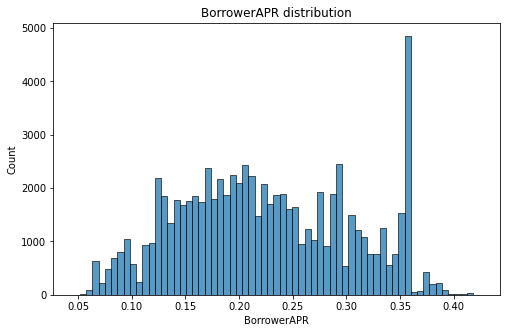

In [34]:
plt.figure(figsize=[8, 5])

g = sns.histplot(loan_df_clean['BorrowerAPR'], color=colors[1]);
g.set_title('BorrowerAPR distribution');
plt.show()

#### Observation
BorrowerAPR appears multimodal, with peaks at 0.13, 0.2, 0.3, and a very sharp peak at 0.35.

Most listings have BorrowAPR below 0.40

### Question: What is the distribution of `BorrowerRate`?

#### Visualisation

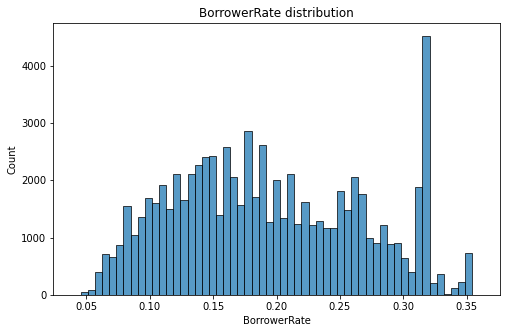

In [35]:
plt.figure(figsize=[8, 5])

g = sns.histplot(loan_df_clean['BorrowerRate'], color=colors[1]);
g.set_title('BorrowerRate distribution');
plt.show()

#### Observation
BorrowerRate distribution mirrors that of BorrowerAPR.

### Question: What loan term do borrowers tend to choose?

#### Visualisation

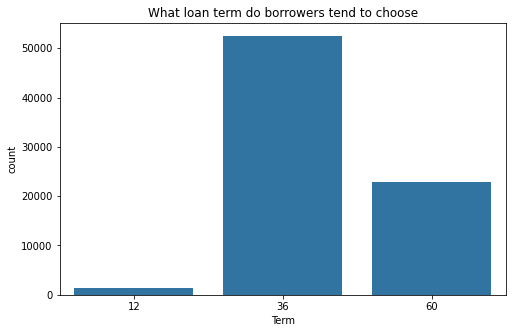

In [36]:
plt.figure(figsize=[8, 5])
g = sns.countplot(data=loan_df_clean, x='Term', color=colors[1]);
g.set_title('What loan term do borrowers tend to choose');
plt.show()

#### Observation
About 65% of borrowers opt for 36-month loans. Less than 5% of borrowers opt for 12-month loans.

### Question : What is the distribution of `AvailableBankcardCredit`?

#### Visualisation

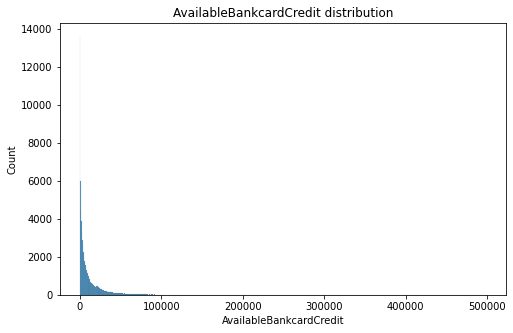

In [37]:
plt.figure(figsize=[8, 5])

g = sns.histplot(loan_df_clean['AvailableBankcardCredit'], color=colors[1]);
g.set_title('AvailableBankcardCredit distribution');
plt.show()

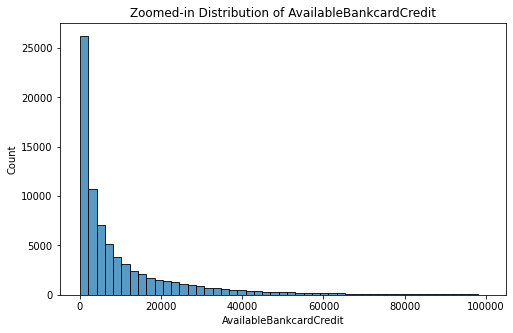

In [38]:
# Zoom into the distribution between 0 and 100000 AvailableBankcardCredit
bins = np.linspace(0, 100000, 50)

plt.figure(figsize=[8, 5])

g = sns.histplot(loan_df_clean['AvailableBankcardCredit'], color=colors[1], bins=bins);
g.set_title('Zoomed-in Distribution of AvailableBankcardCredit');
plt.show()

#### Observation

Most borrowers had bankcard credit under 20,000 USD when their credit profile was pulled

### Question : What is the distribution of `LoanStatus`?

#### Visualisation

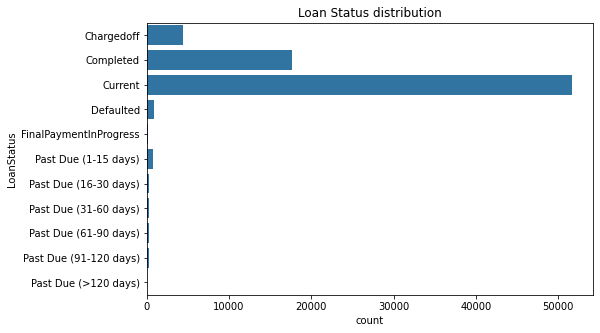

In [39]:
plt.figure(figsize=[8, 5])
g = sns.countplot(data=loan_df_clean, y='LoanStatus', color=colors[1]);
g.set_title('Loan Status distribution');
plt.show()

#### Observation

Most of the listings (over 50,000 records) are current loans.

Given that most of the loans are current, it will be difficult to tell if what percentage of borrowers have been paying off their loans.

### Question: What is the distribution of `LoanOriginalAmount`?

#### Visualisation

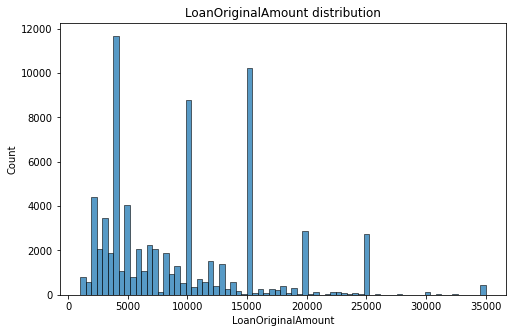

In [40]:
plt.figure(figsize=[8, 5])

g = sns.histplot(loan_df_clean['LoanOriginalAmount'], color=colors[1]);
g.set_title('LoanOriginalAmount distribution');
plt.show()

#### Observation

The distribution is multimodal, with peaks at around 5k, 10k, 15k, 20k and 25k. 

It seems loans are usually taken in multiples of $5,000.

### Question: Are borrowers borrowing more than they can afford to pay back?

### Visualisation

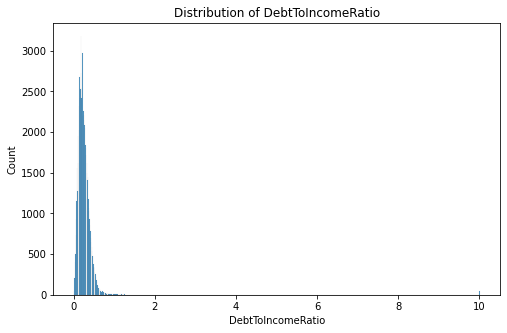

In [41]:
plt.figure(figsize=[8, 5])

g = sns.histplot(loan_df_clean['DebtToIncomeRatio'], color=colors[1]);
g.set_title('Distribution of DebtToIncomeRatio');
plt.show()

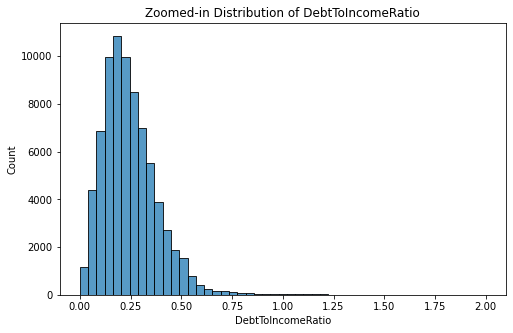

In [42]:
# Zoom into the distribution between 0 and 2 DebtToIncomeRatio
bins = np.linspace(0, 2, 50)

plt.figure(figsize=[8, 5])

g = sns.histplot(loan_df_clean['DebtToIncomeRatio'], color=colors[1], bins=bins);
g.set_title('Zoomed-in Distribution of DebtToIncomeRatio');
plt.show()

### Observation

Borrowers seem to be borrowing within their means, with the average debt being around 25% of income.

### Question: What are the main reasons Prosper clients borrow money?

#### Visualisation

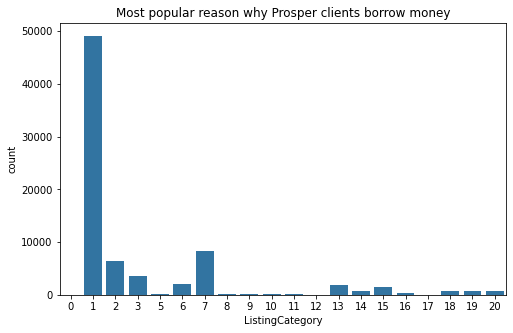

In [43]:
plt.figure(figsize=[8, 5])
g = sns.countplot(data=loan_df_clean, x='ListingCategory', color=colors[1]);
g.set_title('Most popular reason why Prosper clients borrow money');
plt.show()

#### Observation

At least 55% (>= 43,000) of borrowers borrow money for '1. Debt Consolidation'. It is intriguing that borrowing money to pay off previous loans is the major borrowing reason.

### Question: What is the distribution of `StatedMonthlyIncome` among borrowers?

#### Visualisation

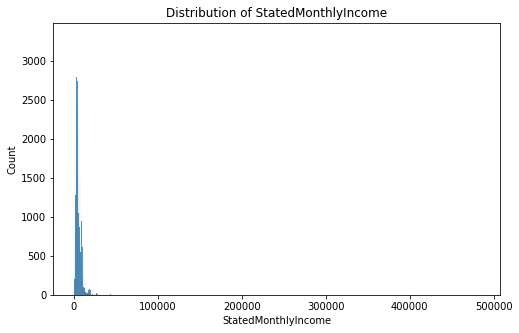

In [44]:
plt.figure(figsize=[8, 5])

g = sns.histplot(loan_df_clean['StatedMonthlyIncome'], color=colors[1]);
g.set_title('Distribution of StatedMonthlyIncome');
plt.show()

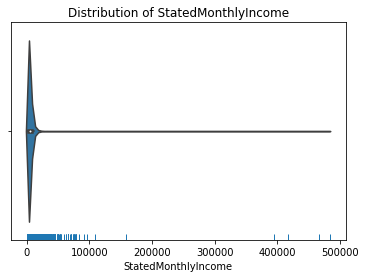

In [45]:
# Plot a violinplot with rugplot to check for outliers
g = sns.violinplot(data=loan_df_clean, x='StatedMonthlyIncome', color=colors[1]);
sns.rugplot(data=loan_df_clean, x='StatedMonthlyIncome', color=colors[1]);
g.set_title('Distribution of StatedMonthlyIncome');
plt.show()

The rugplot shows us outliers at around 390k to 500k. I will detect the outliers using Interquartile range and remove them

In [46]:
# Detect outliers using IQR
Q1 = np.percentile(loan_df_clean['StatedMonthlyIncome'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(loan_df_clean['StatedMonthlyIncome'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("The shape of the dataset before removing outliers is: ", loan_df_clean.shape)
 
# Upper bound
upper_limit = Q3 + 1.5*IQR

print("The upper limit of StatedMonthlyIncome is: ", upper_limit)
 
# Remove the Outliers
loan_df_clean = loan_df_clean[loan_df_clean['StatedMonthlyIncome'] < upper_limit]
 
print("The shape of the dataset after removing outliers is: ", loan_df_clean.shape)

The shape of the dataset before removing outliers is:  (76754, 20)
The upper limit of StatedMonthlyIncome is:  12622.5
The shape of the dataset after removing outliers is:  (73274, 20)


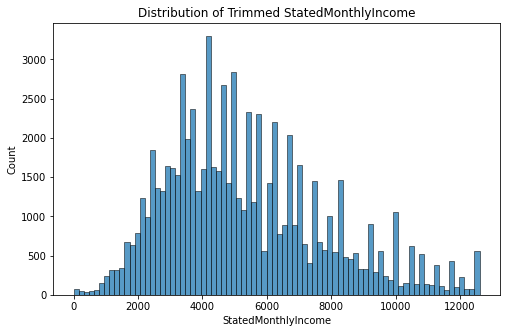

In [47]:
# Investigate the trimmed dataset
plt.figure(figsize=[8, 5])

g = sns.histplot(loan_df_clean['StatedMonthlyIncome'], color=colors[1]);
g.set_title('Distribution of Trimmed StatedMonthlyIncome');
plt.show()

#### Observation
Stated Monthly Income distribution was severely right-skewed with most borrower incomes below $20,000

When trimmed to remove outliers, we notice a significant peak around $4,000. 

### Question: What's the distribution of the Monthly Loan Payments?

### Visualisation

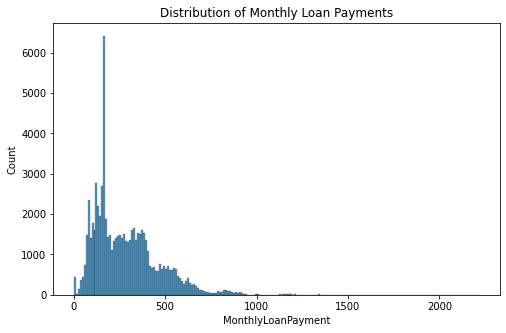

In [48]:
plt.figure(figsize=[8, 5])

g = sns.histplot(loan_df_clean['MonthlyLoanPayment'], color=colors[1]);
g.set_title('Distribution of Monthly Loan Payments');
plt.show()

### Observation
The distribution is unimodal, with a sizeable portion of borrowers paying around 200 USD per month.

Most monthly loan payments are less than 1000 USD. This correlates with the idea that most of these are personal loans.

### Question: What income range gets the most loans?

### Visualisation

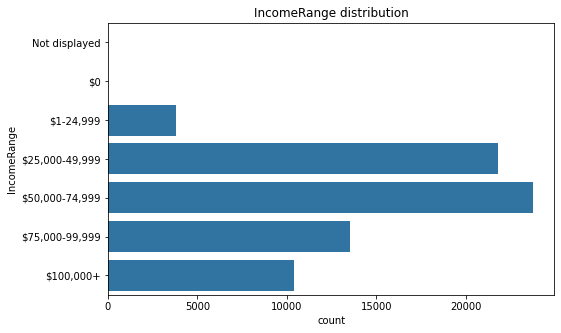

In [49]:
plt.figure(figsize=[8, 5])
g = sns.countplot(data=loan_df_clean, y='IncomeRange', color=colors[1]);
g.set_title('IncomeRange distribution');
plt.show()

### Observation
Most borrowers who received loans earned between 25,000 and 74,999 USD per year.

### Question: What are the distributions of Home ownership, Employment status, and Occupation in the dataset?

### Visualisation

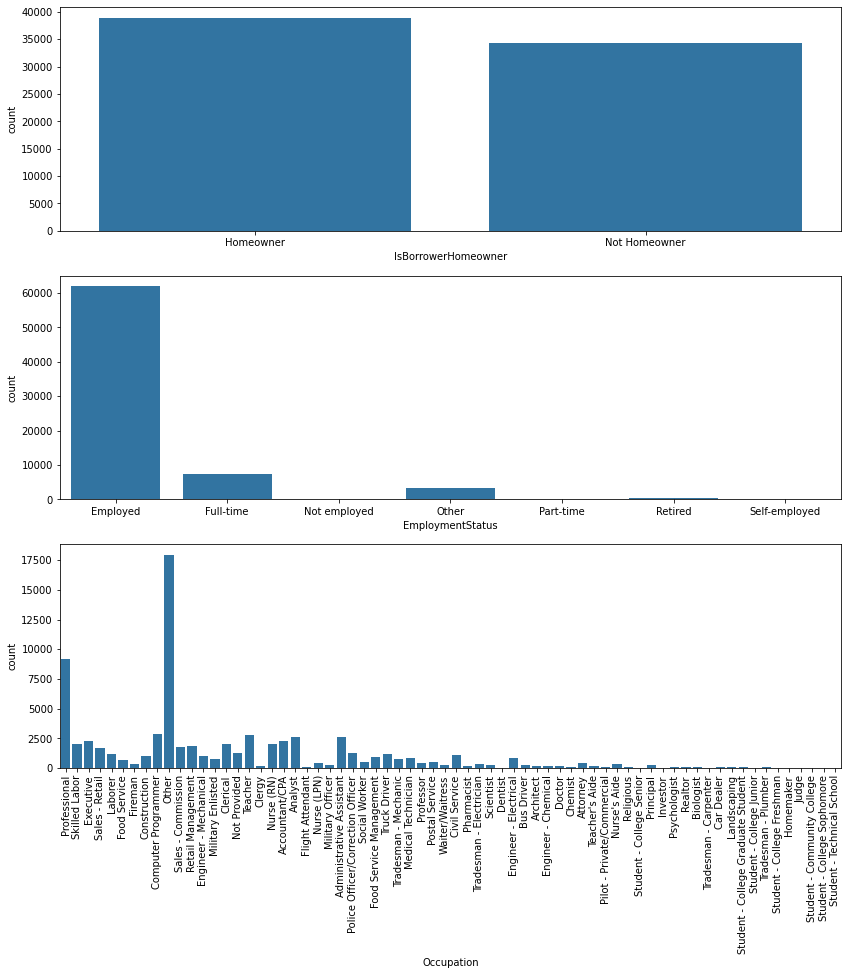

In [50]:
fig, ax = plt.subplots(nrows=3, figsize = [14,14])

columns = ['IsBorrowerHomeowner', 'EmploymentStatus', 'Occupation']

# for col, index in zip(columns, range(3)):
#    sns.countplot(data=loan_df, x=loan_df[col],color = colors[1], ax= ax[index])
# plt.tight_layout();

for col, ind in zip(columns, range(3)):
    sns.countplot(data=loan_df_clean, x=loan_df_clean[col], color=colors[1], ax=ax[ind])

#plt.tight_layout();
plt.xticks(rotation=90);
plt.show();


### Observation
Slightly more than half of the listings are homeowners.

Most loans (about 80%) go to those who are employed, with almost none going to those who report as self-employed or not employed. Do the self-employed and non-employed seek no loans or is it that they are largely unsuccessful in securing loans?

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The BorrowerAPR range lies between 0.05 to 0.4 while that of BorrowerRate lies between 0.05 to 0.35. In other words, BorrowerAPR is slightly higher than BorrowerRate. This makes sense as BorrowerAPR includes total costs of the loan, including the Borrower Rate.<br>
>
> BorrowerAPR and BorrowerRate are similarly distributed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I observed outliers while exploring the StatedMonthlyIncome variable. The skew was severe, so I had to identify and remove the outliers using IQR.<br>
>
> When investigating the Debt to Income Ratio and Available Bankcard Credit, I had to zoom in to focus on the range containing most of the data.

## Bivariate Exploration

In this section, I'll investigate relationships between pairs of variables in the
data.

### Question: Examine the pairwise correlations between features in the dataset

#### Visualisation

In [52]:
# Group numeric and categorical variables together
numeric_vars = ['LoanOriginalAmount', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'BorrowerRate', 'BorrowerAPR', 
                'EmploymentStatusDuration', 'DebtToIncomeRatio', 'AvailableBankcardCredit', 'DelinquenciesLast7Years']
categoric_vars = ['Term', 'ProsperRating','EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange']

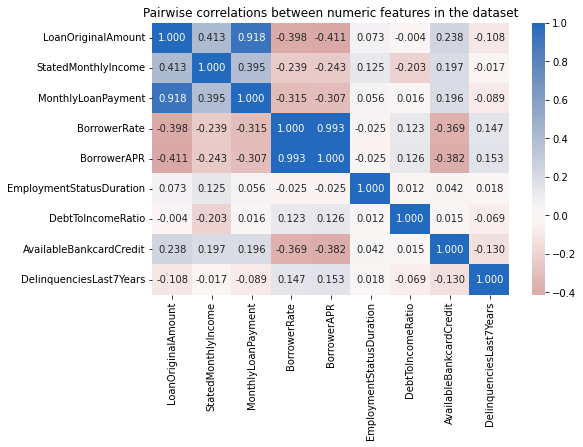

In [53]:
# correlation plot
plt.figure(figsize = [8, 5])
g = sns.heatmap(loan_df_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
g.set_title('Pairwise correlations between numeric features in the dataset');
plt.show()

#### Observation

- **`BorrowerAPR`** and BorrowerRate are strongly positively correlated (0.993). This makes sense as **`BorrowerAPR`** is BorrowerRate + other costs.

- LoanOriginalAmount seems to be moderately negatively correlated (-0.411) with **`BorrowerAPR`**. This suggests that larger loans may attract lesser annual fees than smaller loans.

- AvailableBankcardCredit is moderately negatively correlated (-0.382) with **`BorrowerAPR`**. It makes intuitive sense that the higher the bank credit available to the borrower, the lower the interest rate they'd pay on a loan.

- **`BorrowerAPR`** is weakly negatively correlated with StatedmonthlyIncome (-0.243).

- It surprised me that **`BorrowerAPR`** is negligibly correlated with DebtToIncomeRatio (0.126) and EmploymentStatusDuration (-0.025). It is also negligibly correlated with DelinquenciesLast7Years (0.153).


Also interesting to note that:
- MonthlyLoanPayment has a strong positive correlation (0.918) with LoanOriginalAmount

- LoanOriginalAmount is moderately positively correlated (0.413) with StatedMonthlyIncome. This suggests that the higher a borrower earns, the larger the loan amount they are able to get.

### Question: Observe the relationships using a scatterplot 

#### Visualisation

loan_df_clean.shape= (73274, 20)
loan_df_clean_samp.shape= (500, 20)


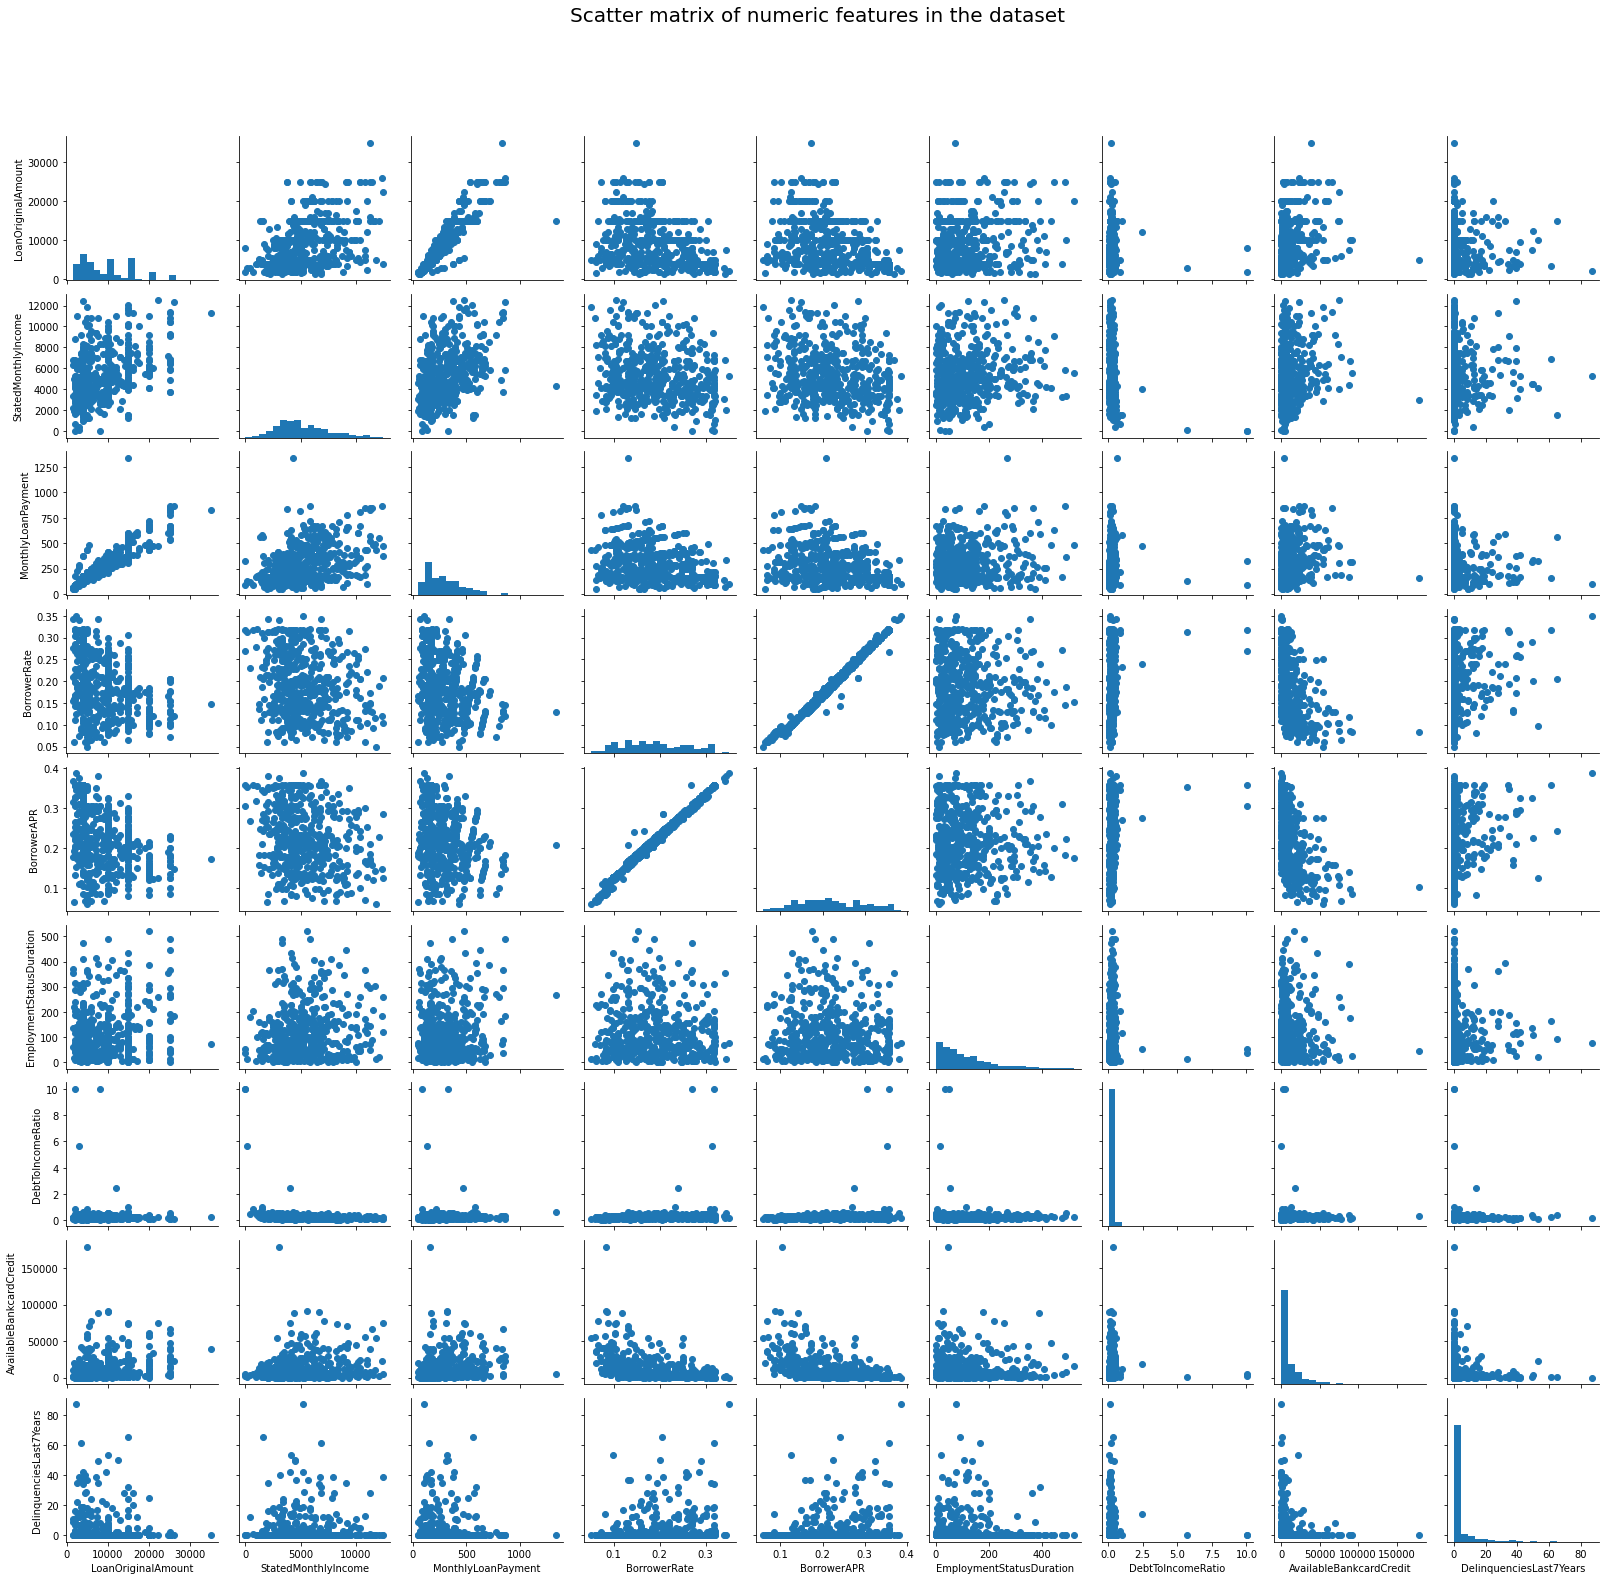

In [54]:
# Plot matrix: Sample 500 listings so that plots render faster and are clearer
print("loan_df_clean.shape=",loan_df_clean.shape)
loan_df_clean_samp = loan_df_clean.sample(n=500, replace = False)
print("loan_df_clean_samp.shape=",loan_df_clean_samp.shape)

g = sns.PairGrid(data = loan_df_clean_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.fig.subplots_adjust(top=0.9) # adjust the figure
g.fig.suptitle('Scatter matrix of numeric features in the dataset', fontsize=20) # Set title
g.map_offdiag(plt.scatter);

#### Observation

As expected, it is confirmed visually that: 
- Borrower APR is strongly positively correlated with BorrowerRate.
- Monthly Loan Payment is moderately positively correlated with LoanOriginalAmount

Also interesting to note, the most delinquencies in the last 7 years are seen in the lower ends of AvailableBankcardCredit.

### Question: LoanOriginalAmount and BorrowerAPR

#### Visualisation

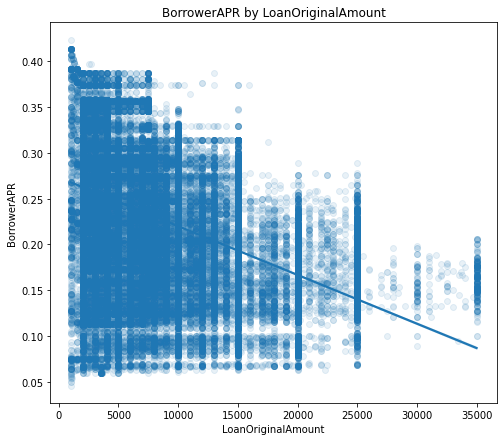

In [55]:
plt.figure(figsize=[8,7]);

g = sns.regplot(data=loan_df_clean, x='LoanOriginalAmount', y='BorrowerAPR', x_jitter=0.3, scatter_kws=({'alpha':1/10}));

plt.title('BorrowerAPR by LoanOriginalAmount');

#### Observation
The larger the LoanOriginalAmount, the lesser the total annual fees a borrower has to pay. No loan greater than 20,000 USD has BorrowerAPR greater than 0.3.

### Question: Relationship between AvailableBankcardCredit and BorrowerAPR

#### Visualisation

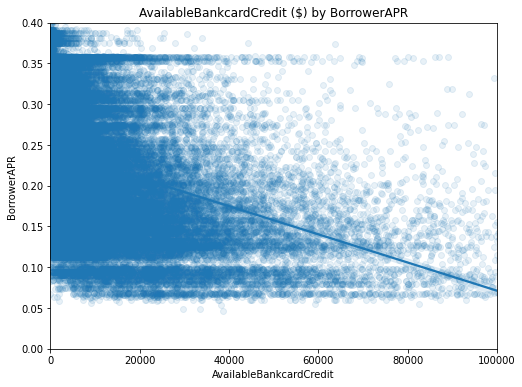

In [56]:
plt.figure(figsize=[8,6]);
sns.regplot(data=loan_df_clean, x='AvailableBankcardCredit', y='BorrowerAPR', x_jitter=0.3, scatter_kws=({'alpha':1/10}));
plt.ylim([0, 0.4]);
plt.xlim([0, 100000])
plt.title('AvailableBankcardCredit ($) by BorrowerAPR');

#### Observation
AvailableBankcardCredit is negatively correlated with BorrowerAPR. This suggests that the higher the bank credit available to the borrower, the lower the total fees they'd pay on a loan.

### Question: Relationship between BorrowerAPR, BorrowerRate and categorical variables

#### Visualisation

Text(0.5, 0.98, 'Relationship between BorrowerAPR, BorrowerRate and categorical variables')

<Figure size 720x720 with 0 Axes>

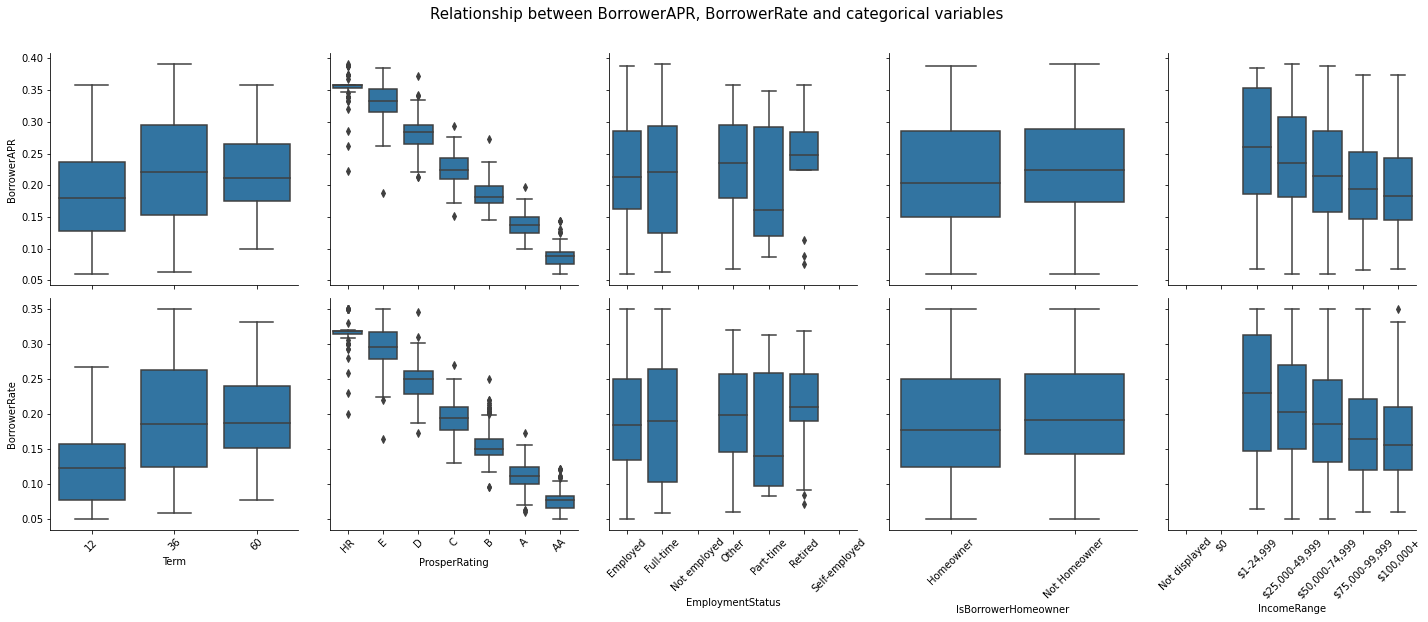

In [57]:
# Plot matrix of BorrowerAPR and BorrowerRate against categorical features.

loan_df_clean_samp = loan_df_clean.sample(n=2000, replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    sns.boxplot(x=x, y=y, color=colors[1]);

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = loan_df_clean_samp, y_vars = ['BorrowerAPR','BorrowerRate'], x_vars = categoric_vars, height=4,
                 aspect = 1.0);
                
g.map(boxgrid);
plt.tight_layout();

# Rotate xticks by 45 degrees
g.fig.draw(
    g.fig.canvas.get_renderer())  # required, as matplotlib calculates ticks during draw time
for ax in g.axes.flat: 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
g.fig.subplots_adjust(top=0.9) # adjust the figure
g.fig.suptitle('Relationship between BorrowerAPR, BorrowerRate and categorical variables', fontsize=15) # Set title


#### Observation
Prosper Rating appears strongly negatively correlated with **`BorrowerAPR`**. The better a borrower's Prosper Rating, the lesser the cost of the loan.

Income Range also appears to be strongly negatively correlated with **`BorrowerAPR`**. UP UNTIL 100,000 USD where, rather interestingly, borrowers who earned 100,000+ USD had a higher BorrowerAPR than borrowers earning 75,000 to 99,999 USD.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Prosper Rating is strongly negatively correlated with **`BorrowerAPR`**. The better a borrower's Prosper Rating, the lesser their loan fees.
>
> As expected, BorrowerRate is strongly positively correlated with **`BorrowerAPR`**. 
>
> IncomeRange is clearly negatively correlated with **`BorrowerAPR`**, with borrowers who earn more tending to pay lesser annual fees. 75% of borrowers earning 50,000 USD and above had BorrowerAPR less than 0.3
>
> It was also interesting to note that larger loans may attract lesser annual fees than smaller loans with LoanOriginalAmount being moderately negatively correlated with **`BorrowerAPR`**.
>
> AvailableBankcardCredit also seemed to have an impact on **`BorrowerAPR`**, with a moderately negative correlation of -0.382.
>
> The following had zero to negligible effect on **`BorrowerAPR`**:  debt-to-income ratio, employment status duration, deliquencies in the last 7 years. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> MonthlyLoanPayment had a very strong positive relationship (0.918) with LoanOriginalAmount
>
> It seems that the higher a borrower earns, the larger the loan amount they request for or are able to get, with LoanOriginalAmount being moderately positively correlated (0.413) with StatedMonthlyIncome.

## Multivariate Exploration

I will create plots of three or more variables to further investigate the relationships with BorrowerAPR in this dataset.

### Question: Relationship between Prosper Rating, Loan Amount, and BorrowerAPR?

#### Visualisation

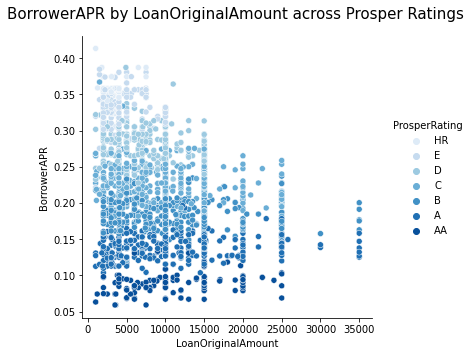

In [58]:
# Visualise the relationship between ProsperRating, BorrowerAPR, and LoanOriginalAmount with relplot
g = sns.relplot(data=loan_df_clean.sample(2000, random_state=1), x='LoanOriginalAmount', y='BorrowerAPR',
            hue='ProsperRating', palette='Blues')

g.fig.subplots_adjust(top=0.9) # adjust the figure
g.fig.suptitle('BorrowerAPR by LoanOriginalAmount across Prosper Ratings', fontsize=15); # Set title

#### Observation
Borrowers with high Prosper ratings tend to pay lower annual fees and often can borrow higher loan amounts, while borrowers wiith low Prosper ratings pay higher annual fees and tend to borrow smaller amounts.

### Question: BorrowerAPR across ProsperRating and Loan Term

#### Visualisation

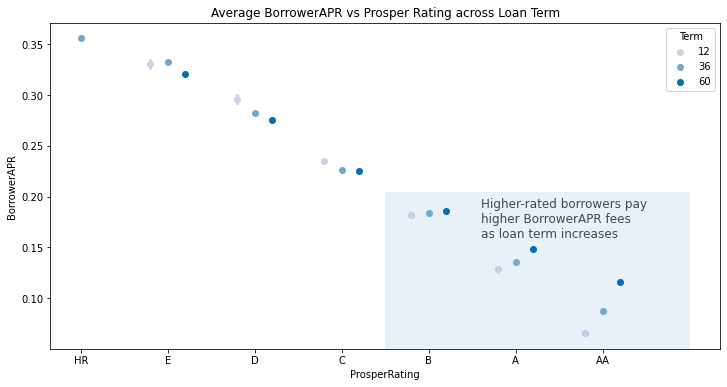

In [59]:
plt.figure(figsize=[12, 6])

g = sns.pointplot(data=loan_df_clean, x='ProsperRating', y='BorrowerAPR', hue='Term', linestyles='',
              palette= 'PuBu', dodge=0.4, scale=0.8)

# Annotate the changes in BorrowerAPR for higher-rated borrowers across loan terms
plt.axvspan(xmin=3.5, xmax=7, ymax=0.48, alpha=0.1)
plt.text(x=4.6, y=0.16, fontsize=12, alpha=0.7,
         s='Higher-rated borrowers pay\nhigher BorrowerAPR fees\nas loan term increases')

g.set_title('Average BorrowerAPR vs Prosper Rating across Loan Term');

#### Observation
Borrowers are likelier to pay more BorrowerAPR for short-term loans than longer-term loans UNLESS they are rated B and above. In which case, longer-term loans become costlier than shorter-term loans. 

### Question: What is the interaction between BorrowerAPR, Loan Amount, and Income Range?

#### Visualisation

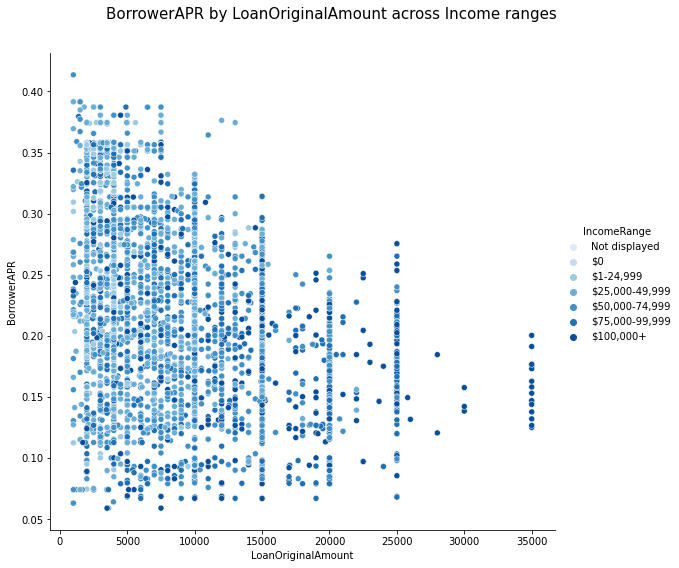

In [60]:
# Visualise the relationship between BorrowerAPR, and LoanOriginalAmount, and Income Range with relplot
g = sns.relplot(data=loan_df_clean.sample(4000, random_state=1), x='LoanOriginalAmount', y='BorrowerAPR',
            hue='IncomeRange', palette='Blues', height=8, aspect=1)

g.fig.subplots_adjust(top=0.9) # adjust the figure
g.fig.suptitle('BorrowerAPR by LoanOriginalAmount across Income ranges', fontsize=15); # Set title

#### Observation
The spread of the blue heat shows that high income earners tend to borrow larger sums and pay lesser annual fees.

### Question: BorrowerAPR vs Homeownership across the years

#### Visualisation

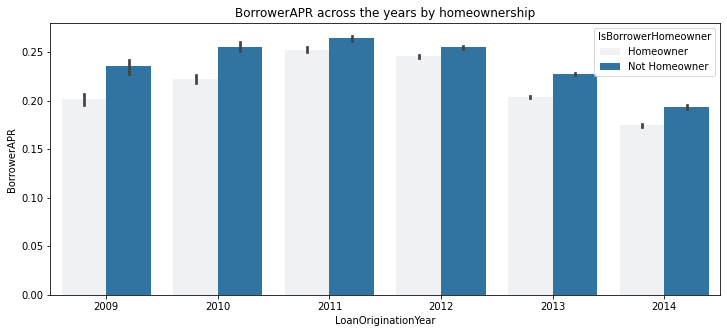

In [61]:
# Plot a barplot showing BorrowerAPR across the years with homeownership as  a third variable
plt.figure(figsize=[12,5])

sns.barplot(data=loan_df_clean, x='LoanOriginationYear', y='BorrowerAPR', hue='IsBorrowerHomeowner', color=colors[1])
plt.title('BorrowerAPR across the years by homeownership');

#### Observation
Over the years, BorrowerAPR is generally lower for home owners than for non-homeowners.

### Question: Relationship between loan original amount, loan term, and BorrowerAPR

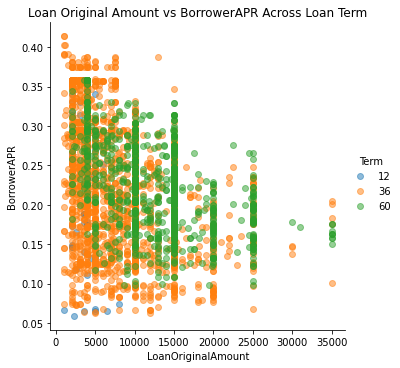

In [62]:
g = sns.FacetGrid(data = loan_df_clean.sample(3000), hue = 'Term', height = 5);
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR', alpha=0.5);
plt.title('Loan Original Amount vs BorrowerAPR Across Loan Term')
g.add_legend();

### Observation
The higher the loan amount and the duration of the loan, the lesser the BorrowerAPR

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- High income earners tend to borrow larger sums and pay lesser annual fees.
- Homeowners consistently paid lesser annual fees on their loans than non-homeowners from 2009 to 2014
- The longer the loan term and the larger the loan, the lesser the BorrowerAPR.

### Were there any interesting or surprising interactions between features?

There weren't any particularly surprising interactions between features. I do confess some apprehension that those who are in greater need of loans (the disadvantaged, unemployed, below middle-class) pay higher fees on their loans.

## Conclusions

In the data wrangling phase, which included importing the data and performing preliminary assessment and cleaning, I isolated the features I was interested in exploring.

Next, I did univariate analysis and explored the distributions of BorrowerAPR, my main feature, and other variables. During the univariate analysis, I discovered that: 
- BorrowerAPR and BorrowerRate are similarly distributed, with BorrowerAPR ranging from 0.05 to about 0.4. 
- The number one reason for borrowing money was to pay off other debt (debt consolidation).

Next, I conducted bivariate analysis by first employing a standard heat map to show the correlations and guide my further exploration of the dataset. During the bivariate analysis, I discovered that BorrowerAPR is: 
- strongly positively correlated with BorrowerRate, 
- negatively correlated with IncomeRange (borrowers who earn more paid lesser annual fees), Loan Original Amount (larger loans attracted lesser annual fees), and Prosper Rating.

Finally, I conducted multivariate analysis to figure out if there were features that could affect the relationships discussed above. I discovered that:
- High income earners tend to borrow larger sums and pay lesser annual fees.
- Throughout the years, homeowners paid lesser annual fees on their loans than non-homeowners.
- The higher the loan amount and the loan term, the lesser the BorrowerAPR.
- However, B-to-AA rated borrowers pay higher BorrowerAPR as loan term increases.

In [64]:
# Save subset dataframe to pickle to preserve datatype changes
loan_df_clean.to_pickle(path='ProsperLoanSubset.pkl')